In [4]:
import numpy as np
import pandas as pd
import material as ml
import thinfilm as tm
import matplotlib.pyplot as plt
from scipy.optimize import minimize

void = ml.Non_Dispersion(1)
LT_ITO = ml.open_material('ITO_LT_Nanya', 'Material')
SiO2 = ml.open_material('SiO2_Nanya', 'Material')
NB = ml.open_material('Nb2O5_Nanya', 'Material')
ITO2 = ml.open_material('ITO_Nanya', 'Material')
w = np.linspace(400,700,301)

L1 = pd.read_csv('./spectrum/Nanya_layer1_R_5.csv')['SCAN'].values

FileNotFoundError: [Errno 2] File ./spectrum/Nanya_layer1_R_5.csv does not exist: './spectrum/Nanya_layer1_R_5.csv'

In [ ]:
sub =  pd.read_csv('./spectrum/TEO/sodalime.csv')
LT_ITO_1 = pd.read_csv('./spectrum/TEO/LT_ITO_1.csv')
LT_ITO_2 = pd.read_csv('./spectrum/TEO/LT_ITO_2.csv')
wl = LT_ITO_1['nm'].values
LT1n = LT_ITO_1['n'].values
LT1k = LT_ITO_1['k'].values
LT2n = LT_ITO_2['n'].values
LT2k = LT_ITO_2['k'].values
soda_n = sub['n'].values
soda_k = sub['k'].values

LT1 = ml.Material(wl, LT1n, LT1k, wl)
LT2 = ml.Material(wl, LT2n, LT2k, wl)
sodalime_Nanya_TEO = ml.Material(wl, soda_n, soda_k, wl)

model1 = lambda th:tm.Design(
    [void, LT_ITO, sodalime_Nanya_TEO],
    [None, th[0], None]
).reflectance(w, 5)

fom = lambda th: sum(100*model1(th)-L1)

[121.18488104]


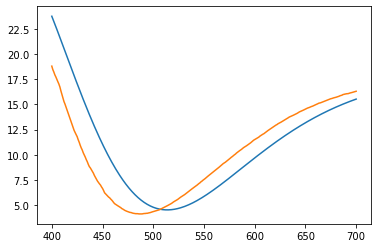

In [8]:
sol = minimize(fom, 100)
print(sol.x)

plt.plot(w, 100*model1(sol.x))
plt.plot(w, L1)
plt.show()

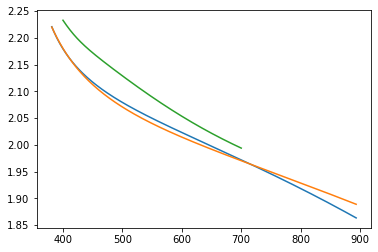

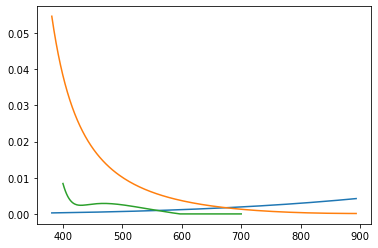

In [9]:
plt.plot(wl, LT1n)
plt.plot(wl, LT2n)
plt.plot(w, LT_ITO.nvalues(w))
plt.show()
plt.plot(wl, LT1k)
plt.plot(wl, LT2k)
plt.plot(w, LT_ITO.kvalues(w))
plt.show()

In [3]:
NBR = pd.read_csv('./spectrum/Nanya_NB_R_5.csv')['SCAN'].values
NB_1 = pd.read_csv('./spectrum/TEO/NB_1.csv')
NB_2 = pd.read_csv('./spectrum/TEO/NB_2.csv')
NB1n = NB_1['n'].values
NB1k = NB_1['k'].values
NB2n = NB_2['n'].values
NB2k = NB_2['k'].values

NB_TEO = ml.Material(wl, NB1n, NB1k, wl)
NB_model = lambda th:tm.Design(
    [void, NB_TEO, sodalime_Nanya_TEO],
    [None, th[0], None]
).reflectance(w, 5)

plt.plot(w, NBR, 'ks', label = 'measurement', markersize = 1)
plt.plot(w, 100*NB_model([10.140]), '-b', label = 'simulation')
plt.legend(loc = 'best')
plt.xlabel('wavelengh (nm)')
plt.ylabel('R%')
plt.savefig('Nanya_TEO_NB.png')
print(tm.RMSE(NBR, 100*NB_model([10.140])))
plt.show()

FileNotFoundError: [Errno 2] File ./spectrum/Nanya_NB_R_5.csv does not exist: './spectrum/Nanya_NB_R_5.csv'

In [11]:
pd.DataFrame({'R':100*NB_model([10.140])}).to_csv('r.csv')

In [3]:
plt.plot(wl, NB1n)
plt.plot(wl, NB2n)
plt.plot(w, NB.nvalues(w))
plt.show()
plt.plot(wl, NB1k)
plt.plot(wl, NB2k)
plt.plot(w, NB.kvalues(w))
plt.show()

NameError: name 'wl' is not defined

In [4]:
SiO2_1 = pd.read_csv('./spectrum/TEO/SiO2_1.csv')
SiO2_2 = pd.read_csv('./spectrum/TEO/SiO2_2.csv')
SiO21n = SiO2_1['n'].values
SiO21k = SiO2_1['k'].values
SiO22n = SiO2_2['n'].values
SiO22k = SiO2_2['k'].values
plt.plot(wl, SiO21n)
plt.plot(wl, SiO22n)
plt.plot(w, SiO2.nvalues(w))
plt.show()
plt.plot(wl, SiO21k)
plt.plot(wl, SiO22k)
plt.plot(w, SiO2.kvalues(w))
plt.show()

NameError: name 'wl' is not defined

In [5]:
ITO = pd.read_csv('./spectrum/TEO/ITO.csv')
ITOn = ITO['n'].values
ITOk = ITO['k'].values
plt.plot(wl, ITOn)
plt.plot(w, ITO2.nvalues(w))
plt.show()
plt.plot(wl, ITOk)
plt.plot(w, ITO2.kvalues(w))
plt.show()

NameError: name 'wl' is not defined